In [1]:
# Import packages
import plotly.express as px
import pandas as pd

In [2]:
# Read in the data
data = pd.read_csv('tea_production.csv')
data['Year-Month'] = pd.to_datetime(data['Year-Month'])

In [5]:
def plot_production_volumes(df: pd.DataFrame,
                           y: str) -> None:
    """General function to plot the production data."""

    fig = px.line(df, x='Year-Month', y=y, labels={'Year-Month': 'Month', 'Mid_Grown_Production_(Kg)': 'Production (Kg)' })
    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text='Mid Grown Tea Production', width=650,
                      title_x=0.5, height=400)

    return fig.show()

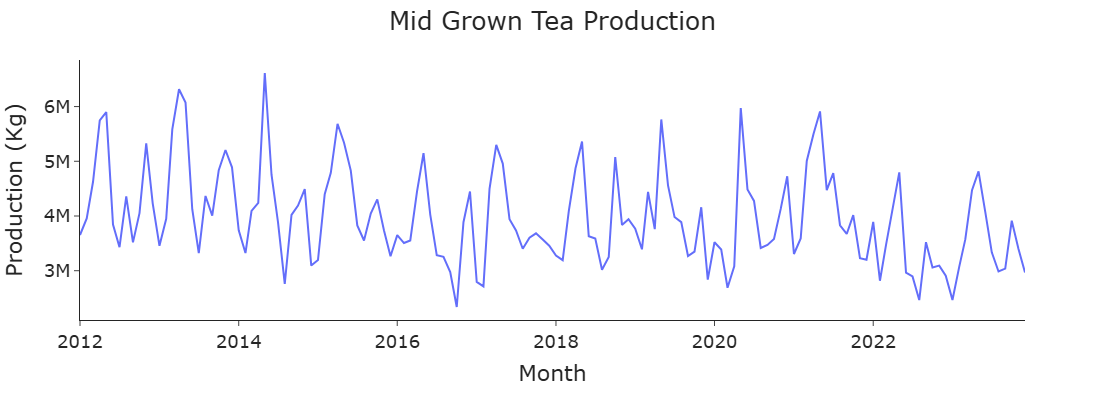

In [7]:
# Plot the mid grown production data
plot_production_volumes(df=data, y='Mid_Grown_Production_(Kg)')

In [8]:
# Import packages 
from scipy.stats import boxcox

In [9]:
# Make the target variance stationary
data['Production_Boxcox'], lam = boxcox(data['Mid_Grown_Production_(Kg)'])

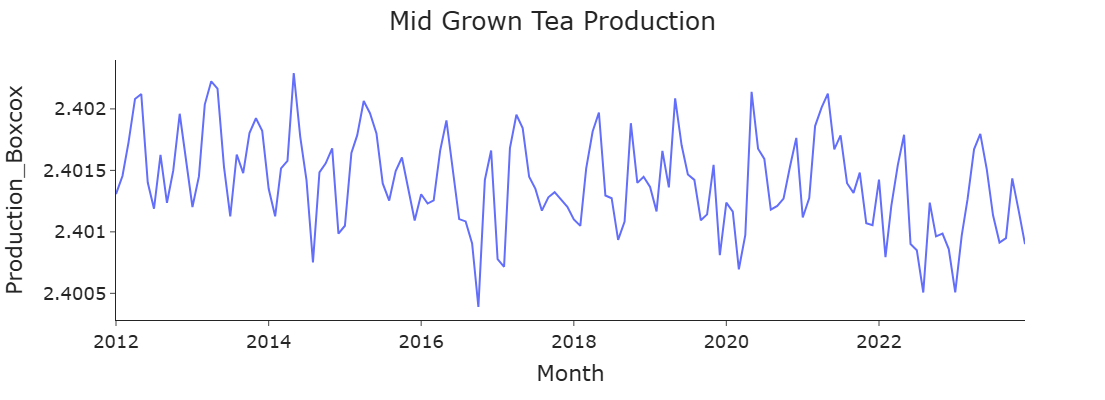

In [10]:
# Plot the box-cox production data
plot_production_volumes(df=data, y='Production_Boxcox')

In [11]:
# Import packages
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [12]:
# Difference the data
data["Production_diff"] = data["Production_Boxcox"].diff()
data.dropna(inplace=True)

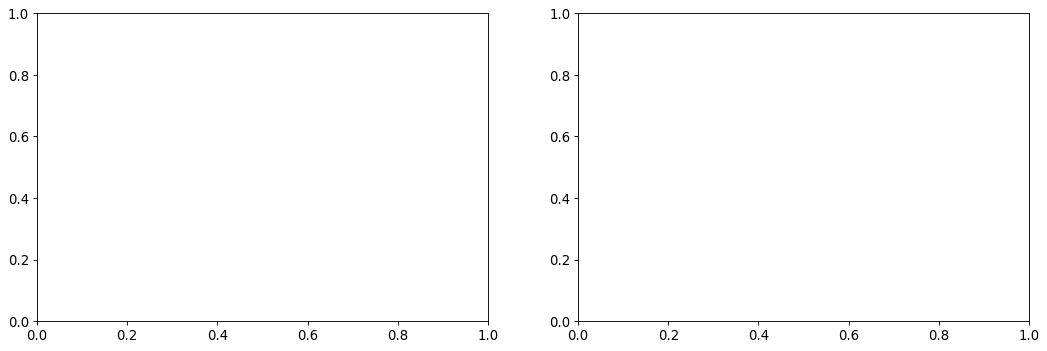

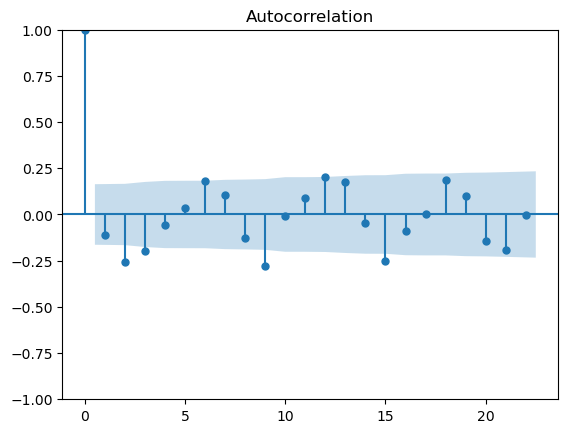

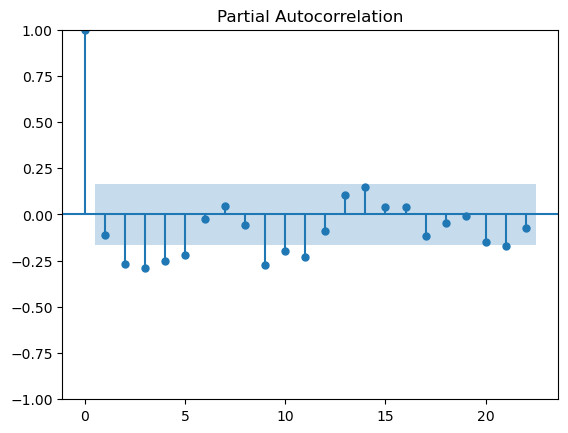

In [13]:
# Plot Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5), dpi=80)
plot_acf(data['Production_diff'])
plot_pacf(data['Production_diff'], method='ywm')
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

In [14]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

In [15]:
# Split train and test
train = data.iloc[:-int(len(data) * 0.2)]
test = data.iloc[-int(len(data) * 0.2):]

In [20]:
# Build ARIMA model and inverse the boxcox
model = ARIMA(train['Production_Boxcox'], order=(2, 1, 2)).fit()
boxcox_forecasts = model.forecast(len(test))
forecasts = inv_boxcox(boxcox_forecasts, lam)

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\hasit\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Fut

In [21]:
# Import packages
import plotly.graph_objects as go

In [24]:
def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train['Year-Month'], y=train['Mid_Grown_Production_(Kg)'], name='Train'))
    fig.add_trace(go.Scatter(x=test['Year-Month'], y=test['Mid_Grown_Production_(Kg)'], name='Test'))
    fig.add_trace(go.Scatter(x=test['Year-Month'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=14), title_text=title,
                      width=650, title_x=0.5, height=400, xaxis_title='Month',
                      yaxis_title='Production Volume')

    return fig.show()

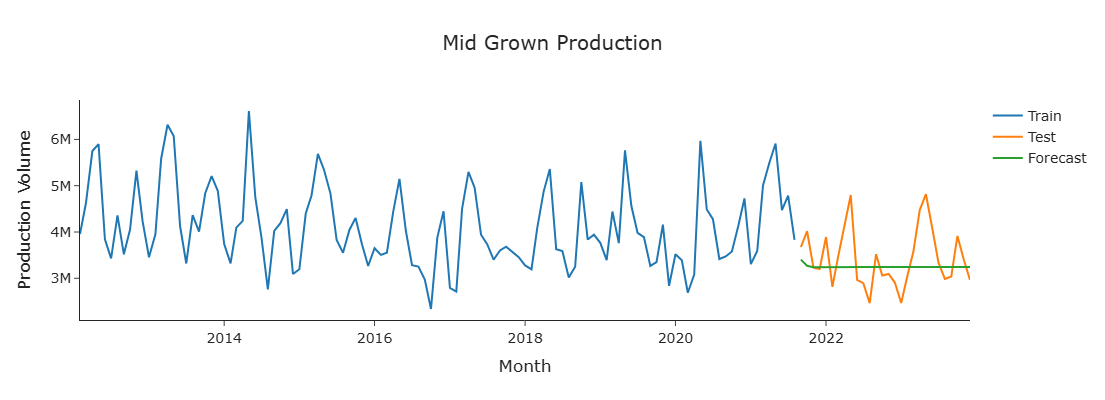

In [25]:
# Plot the forecasts
plot_forecasts(forecasts, 'Mid Grown Production')